Khai báo các thư viện

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,  BatchNormalization
from keras.models import Model
import idx2numpy
import matplotlib.pyplot as plt

Lấy dữ liệu, train, test ở thư mục datamnist:

(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)
2
60000


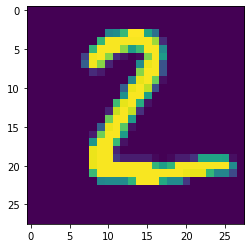

In [2]:
test_X = idx2numpy.convert_from_file('datamnist/test_image.idx3-ubyte')
train_X = idx2numpy.convert_from_file('datamnist/train_image.idx3-ubyte')

test_Y = idx2numpy.convert_from_file('datamnist/test_labels.idx1-ubyte')
train_Y = idx2numpy.convert_from_file('datamnist/train_labels.idx1-ubyte')

print(test_X.shape)
print(train_X.shape)
print(test_Y.shape)
print(train_Y.shape)

plt.imshow(test_X[1,:,:])
print(test_Y[1])
print(len(train_Y))


Tập train có 60.000 ảnh, tập test có 10.000 ảnh; mỗi bức ảnh có kích thước 28x28; Ví dụ ảnh thứ 2 của tập test là số 2 được biểu diễn như trên. Chuyển đổi kích thước của tập train (trải ảnh ra 28 x 28 = 784)

In [3]:
train_X = train_X.reshape(train_X.shape[0], -1).T
test_X = test_X.reshape(test_X.shape[0], -1).T

train_X = np.transpose(train_X) / 255
test_X = np.transpose(test_X) / 255
print(train_X.shape)
print(test_X.shape)

(60000, 784)
(10000, 784)


Ta chuyển test_Y, train_Y sang vecto one_hot:

In [4]:
def one_hot(X):
    onehot = np.zeros((X.shape[0], np.max(X)+1))
    for i in range(X.shape[0]):
        onehot[i][X[i,]] = 1
    return onehot

train_Y = train_Y.reshape(train_Y.shape[0],1)
train_Y = one_hot(train_Y)
test_Y = test_Y.reshape(test_Y.shape[0],1)
test_Y = one_hot(test_Y)

print(train_Y.shape)
print(test_Y.shape)
print(test_Y[1,:])


(60000, 10)
(10000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Sau khi chuyển thành vecto one_hot, số 2 của tập test được biểu diễn lại như trên. Sau đây ta xây dựng mô hình:

In [6]:
def mnist(input_shape, lop_an = [128, 64]):
    X_input = Input(input_shape)
    X = X_input
    for i in range(len(lop_an) -1):
        X = Dense(lop_an[i], activation='relu')(X)
    X = Dense( 10, activation='sigmoid')(X)
    model = Model(inputs = X_input, outputs = X, name='mnist')

    return model

In [7]:
Mnist = mnist(train_X.shape[1:], [128,64])

In [8]:
Mnist.compile(loss ='categorical_crossentropy', metrics = ["accuracy"])

In [9]:
Mnist.fit(x = train_X, y = train_Y, epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4014 - accuracy: 0.8865
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1309 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0896 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0695 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0583 - accuracy: 0.9831


In [10]:
preds_train = Mnist.evaluate(x = train_X, y = train_Y)
preds_test = Mnist.evaluate(x = test_X, y = test_Y)

print()
print ("Loss = " + str(preds_train[0]))
print ("Train Accuracy = " + str(preds_train[1]))

print()
print ("Loss = " + str(preds_test[0]))
print ("Test Accuracy = " + str(preds_test[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9759

Loss = 0.04633837938308716
Train Accuracy = 0.9869166612625122

Loss = 0.08192501962184906
Test Accuracy = 0.9758999943733215
